# Imports

In [2]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim

import nltk
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
RANDOM_SEED = 123
DEVICE = "cuda"
ly = pd.read_csv(r'', delimiter = ",", dtype = {'lyrics':str}) #insert csv file location
#ly = ly[ly.tags != "rock"]

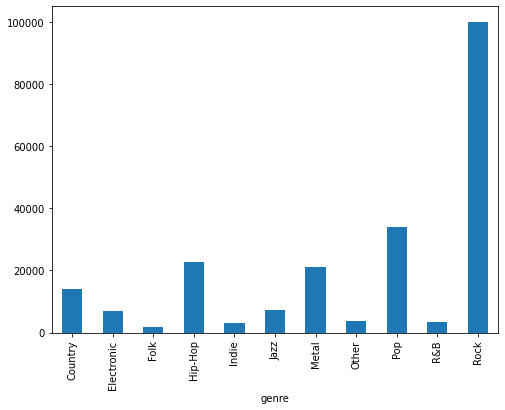

In [3]:
fig = plt.figure(figsize=(8,6))
ly.groupby('genre').lyrics.count().plot.bar(ylim=0)
plt.show() 

In [38]:
len(ly)

218209

In [40]:
import nltk
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;|\n]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
lyrics = ly["lyrics"]
def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "hmtl.parser").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    return text
    
lyrics = lyrics.apply(clean_text)
ly["lyrics"]=lyrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FeatureNotFound: Couldn't find a tree builder with the features you requested: hmtl.parser. Do you need to install a parser library?

In [44]:
X = ly.lyrics
y = ly.genre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4)

In [48]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, multi_class = "multinomial", 
                                           C=100000, solver = "sag", class_weight="balanced")),
               ])

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
my_tags = ["rock","pop","indie", "R&B","country","hip-hop","folk","indie","jazz","other","electronic"]
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


accuracy 0.45780058964605963
              precision    recall  f1-score   support

        rock       0.33      0.47      0.39      4174
         pop       0.16      0.27      0.20      2104
       indie       0.10      0.13      0.11       500
         R&B       0.74      0.72      0.73      6723
     country       0.07      0.14      0.09       872
     hip-hop       0.22      0.33      0.26      2255
        folk       0.54      0.56      0.55      6277
       indie       0.08      0.15      0.10      1173
        jazz       0.35      0.38      0.36     10168
       other       0.10      0.25      0.14      1012
  electronic       0.66      0.46      0.54     30205

    accuracy                           0.46     65463
   macro avg       0.30      0.35      0.32     65463
weighted avg       0.52      0.46      0.48     65463

